<a href="https://colab.research.google.com/github/YumnaZai/ML-Projects/blob/main/Regression-Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression Model - Predict the median home value**

# What Model :
Linear Regression Model
Decision Tree
Neural Network
Polynomial Regression
Random Forest

### What is solved : Regression

#### This dataset contains 506 records with 13 features, used to predict the median home value

#Import libraries

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

#Load the data

In [339]:
#loading the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/BostonHousing.csv', header=None, names=column_names, skiprows=1)

In [340]:
#Data Frame
ds_houseprice = pd.DataFrame(data)
ds_houseprice.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [341]:
ds_houseprice.shape

(506, 14)

#Explanatory Data Analysis

##1.Understand the dataset

In [342]:
ds_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [343]:
desc_stast = ds_houseprice.describe()
desc_stast

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1. They are : ZN  with 0 for 25th, 50th percentiles.
2. Second, CHAS: Charles River dummy variable with 0 for 25th, 50th and 75th percentiles.
3. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV
4. Another interesing fact on the dataset is the max value of MEDV. Based on that, values above 50.00 may not help to predict MEDV.

##2.Handle Missing Values

In [344]:
#Check missing values|
print(ds_houseprice.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


There are no missing values

##3.Data Cleaning

In [345]:
# Check for duplicates
ds_houseprice.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
501,False
502,False
503,False
504,False


In [346]:
#Converting all features to numeric
# Select only numerical columns
numerical_df = ds_houseprice.select_dtypes(include=np.number)

# Check if the shape of the numerical DataFrame is the same as the original DataFrame
all_numerical = numerical_df.shape[1] == ds_houseprice.shape[1]

print(f"Are all features numerical? {all_numerical}")

Are all features numerical? True


Therefore no need of convertion

In [347]:
#Checking for low variance
# Calculate variance from standard deviation
variance = desc_stast.loc['std'] ** 2
print(variance)

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
MEDV          84.586724
Name: std, dtype: float64


chas (0.0645) is very low → likely not useful (it's a dummy variable: 0 or 1).

nox (0.0134) is also quite low

Variables with lower variance is conciderer ingignificant in predicting the house price

### Handle **Outliers**

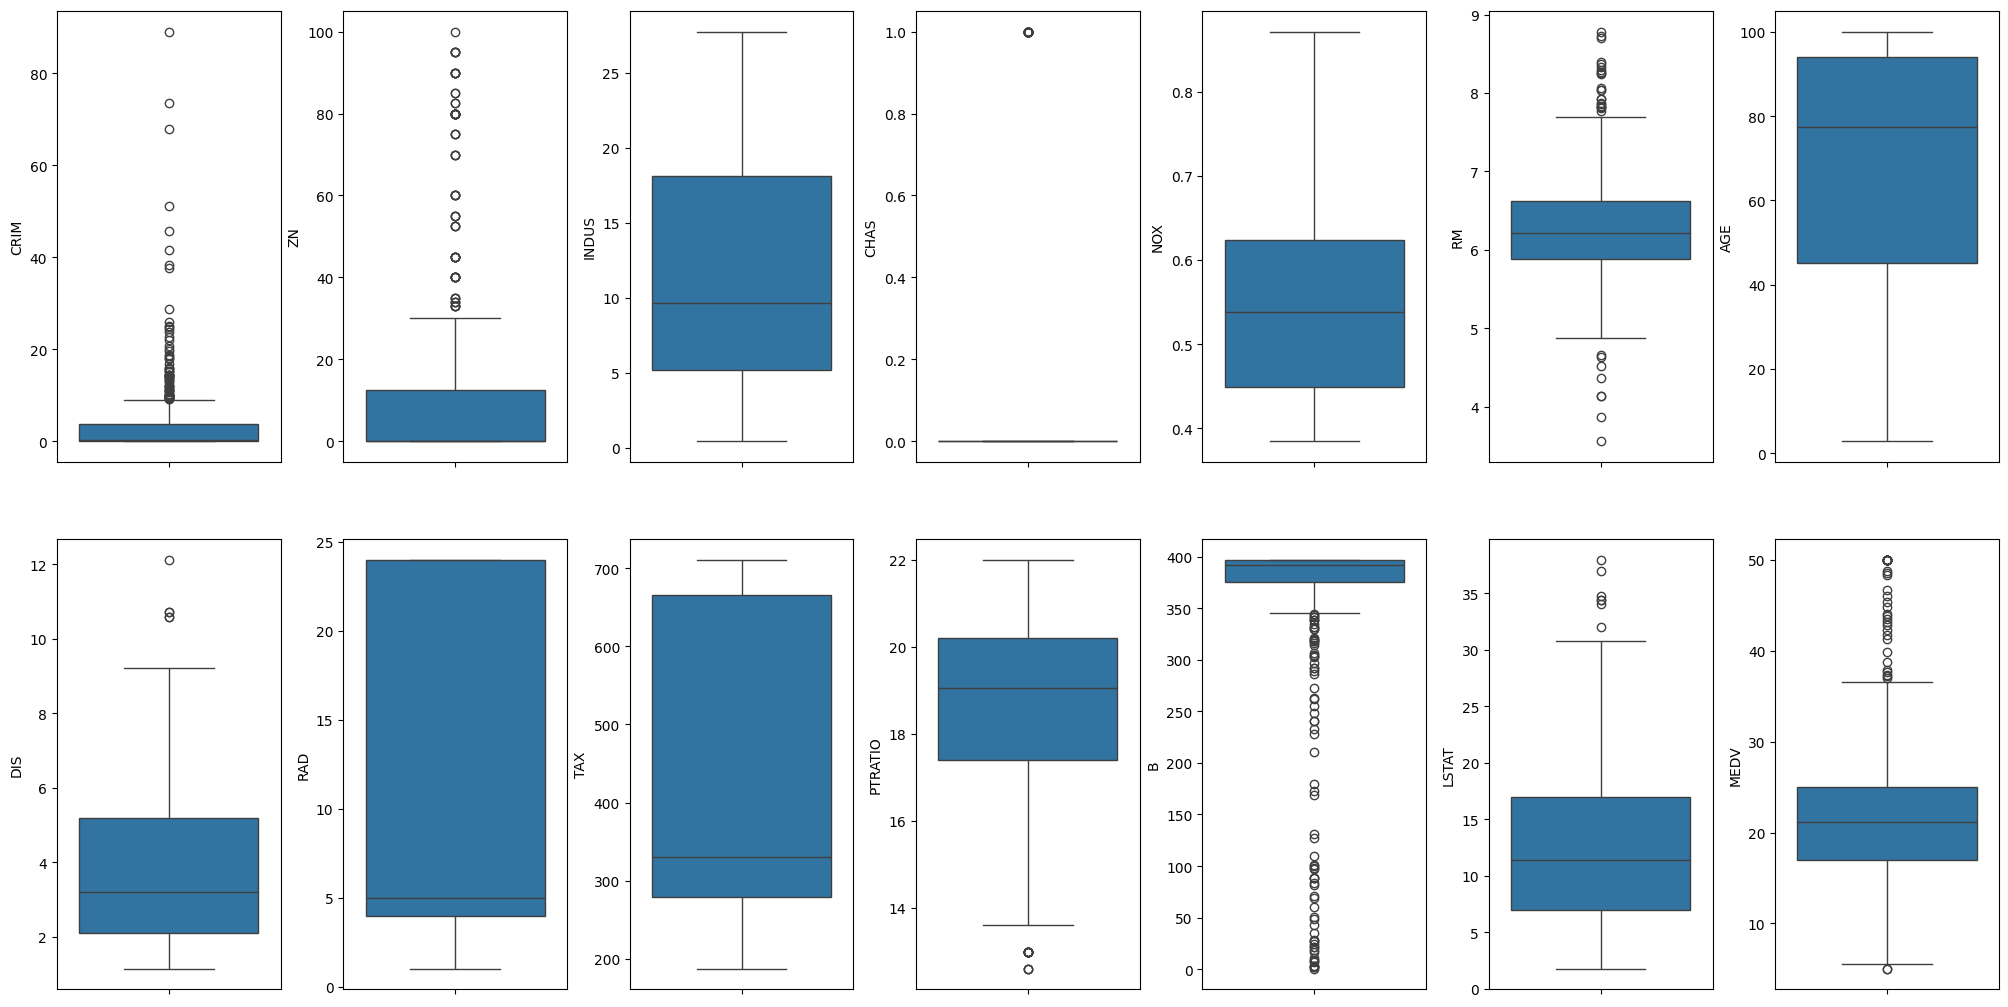

In [348]:
#Identify outliers using boxplot
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=ds_houseprice, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [349]:
#Calculating outlier percentage
for k, v in ds_houseprice.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Columns like CRIM, ZN, RM, B seems to have outliers

In [350]:
ds_houseprice = ds_houseprice[~(ds_houseprice['MEDV'] >= 50.0)]
print(np.shape(ds_houseprice))

(490, 14)


In [351]:
for k, v in ds_houseprice.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]

  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.85%
Column ZN outliers = 12.85%
Column INDUS outliers = 0.00%
Column CHAS outliers = 96.84%
Column NOX outliers = 0.00%
Column RM outliers = 4.55%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.57%
Column B outliers = 15.42%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 4.35%


##4.Feature Selection

<Axes: >

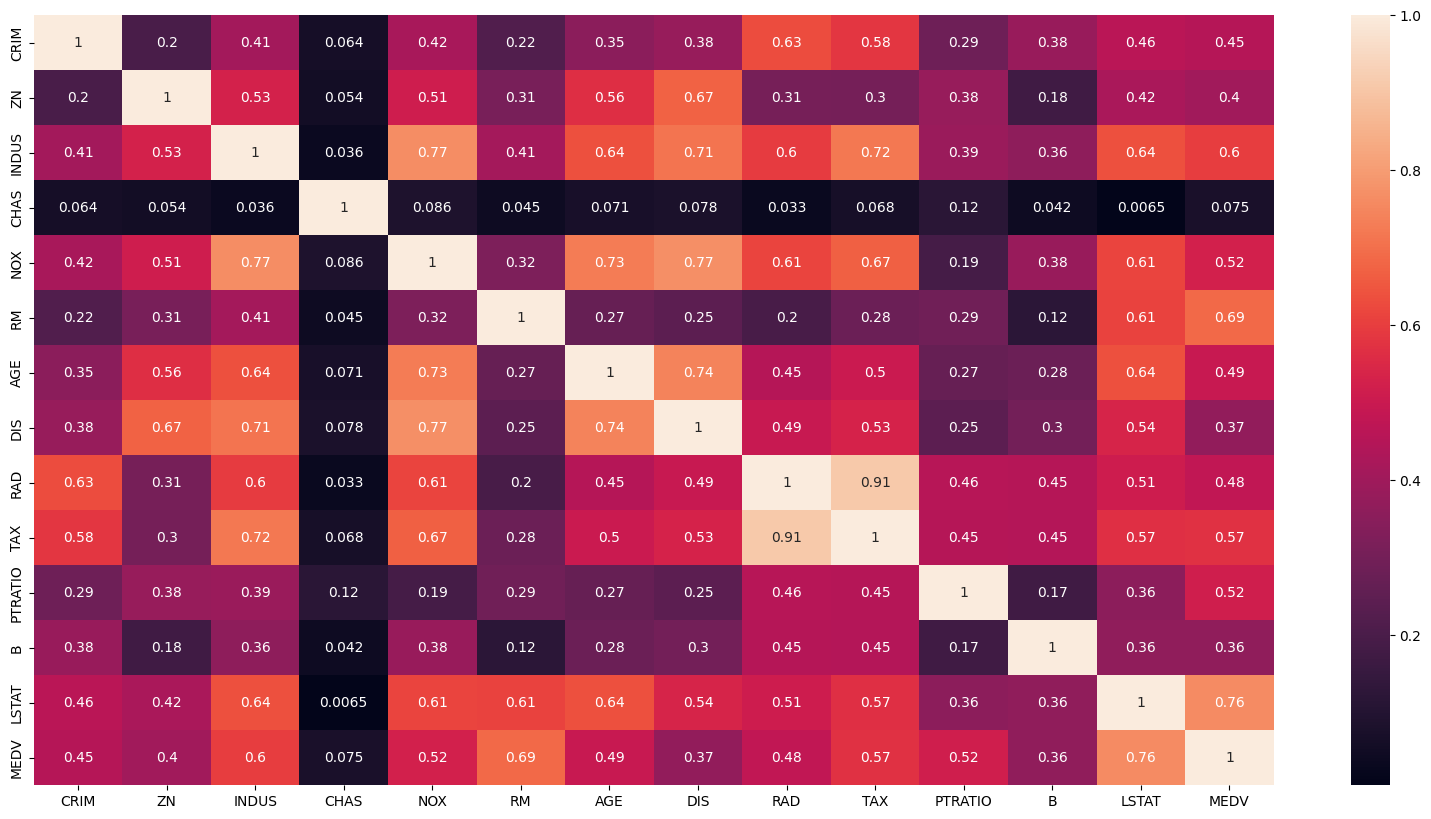

In [352]:
# Technique 1
#Correlation - Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(ds_houseprice.corr().abs(),  annot=True)

From correlation matrix, The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

Conclsion : ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

##4. Univariate Analysis

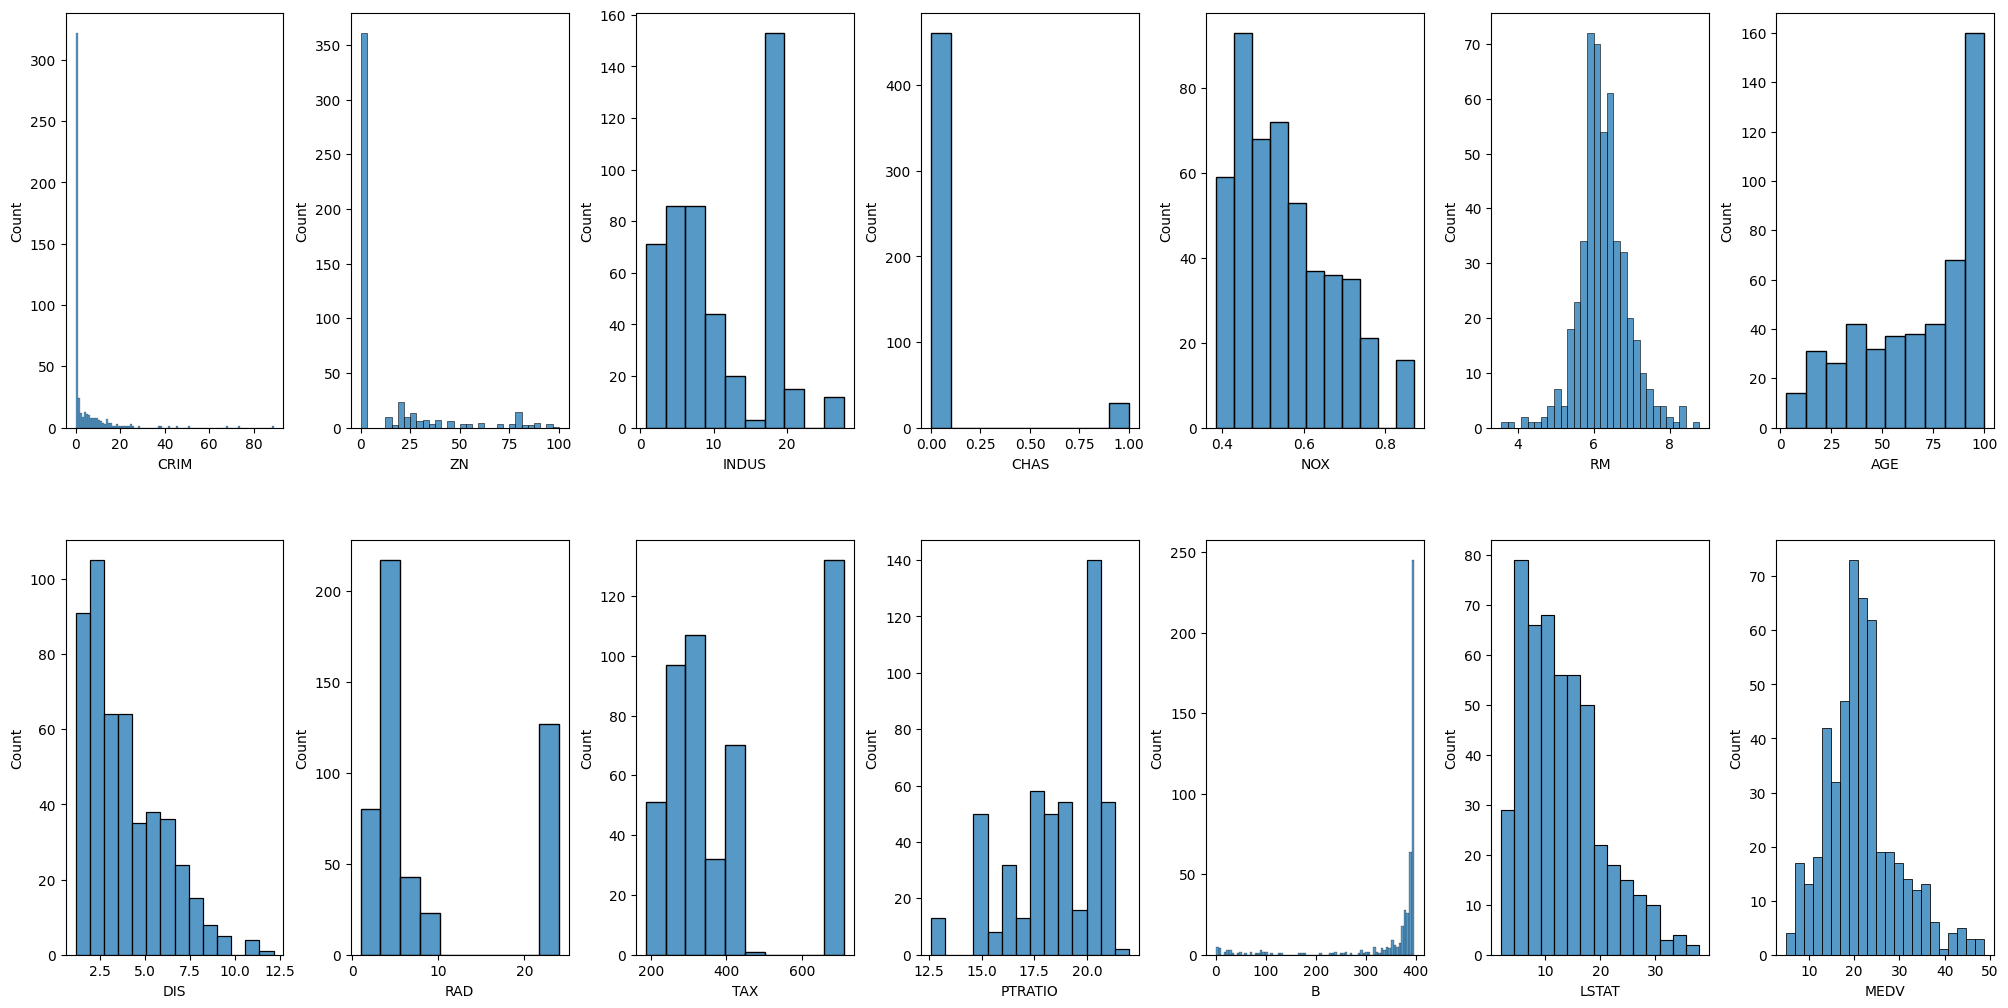

In [353]:
#Check skewness and spread
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in ds_houseprice.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

## Visualize the data

##Normalization

In [354]:
from sklearn.preprocessing import MinMaxScaler
# Let's scale the columns before plotting them against MEDV

#Temporary assignment of features and output
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = ds_houseprice.loc[:,column_sels]
y = ds_houseprice['MEDV']

min_max_scaler = MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)


##Visualization

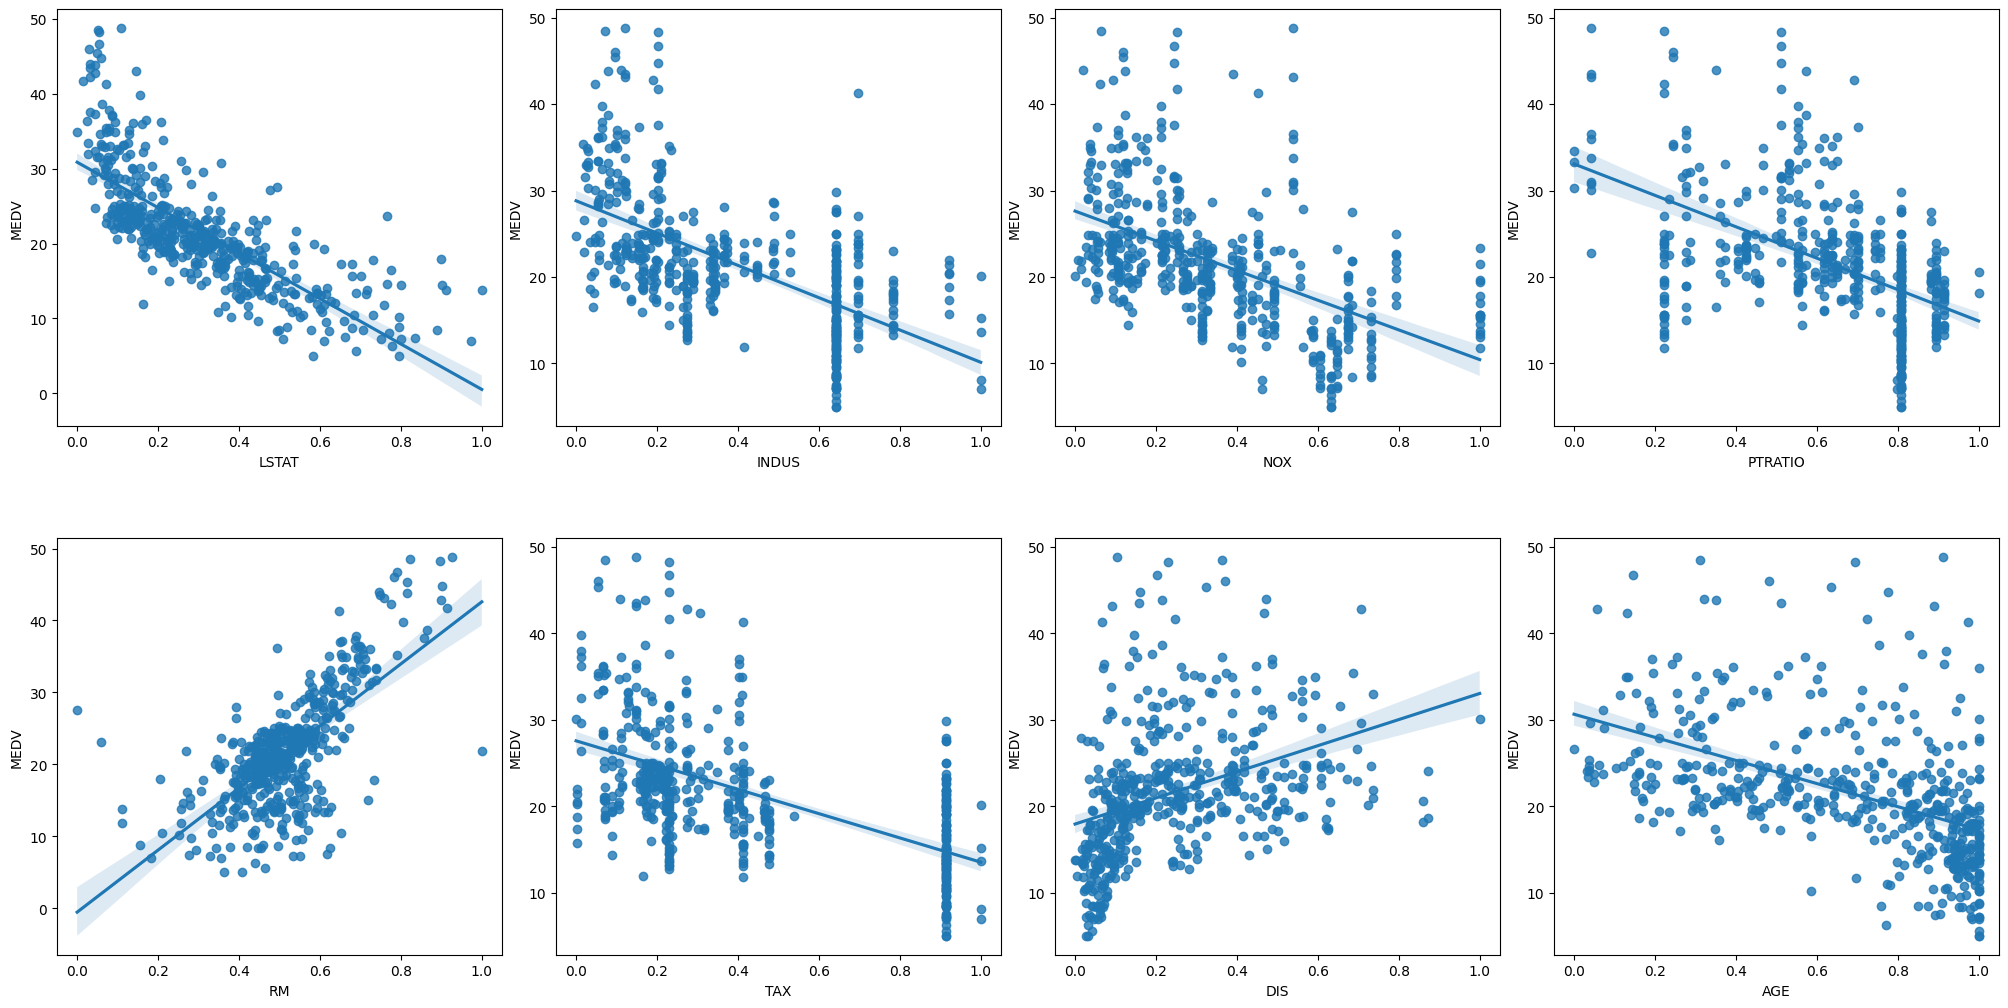

In [355]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##Converting categorical data to numerical data

In [356]:
# Convert categorical variables into dummy/indicator variables
#One-hot encoding
ds_houseprice = pd.get_dummies(ds_houseprice, drop_first=True)

#Defining the featues and the lables

In [357]:
# Define features and target variable
X = ds_houseprice.drop('MEDV', axis=1) #drop the feature that goining to assign for a y variable
y = ds_houseprice['MEDV'] #y the predicting varible has assigned


#Spliting data

In [358]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
#Check if there are any categorical variables
print(X_train.select_dtypes(include=['object']).columns)
print(X_train[X_train.select_dtypes(include=['object']).columns].head())

Index([], dtype='object')
Empty DataFrame
Columns: []
Index: [336, 140, 449, 432, 504]


#Standadizing features


In [360]:
# Standardize features for Linear Regression and Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#MODEL 1 - DECISION TREE

#Train Model

In [361]:
#Model
from sklearn.tree import DecisionTreeRegressor
#Matrix
from sklearn.metrics import mean_squared_error, r2_score


# 1) Decision Tree
dt_regressor = DecisionTreeRegressor(random_state=42) # Change to DecisionTreeRegressor for continuous target
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

#Evaluate Model

In [362]:
# For regression
from sklearn.metrics import mean_squared_error, r2_score

#Prediction value
y_pred_dt = dt_regressor.predict(X_test)

#Evaluation Matics
print("\nDefault Decision Tree Performance:")
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))


Default Decision Tree Performance:
Decision Tree MAE: 2.360204081632653
Decision Tree MSE: 9.372551020408164
Decision Tree R2: 0.8165315553300648


#Hyper parameter Optimization

In [363]:
from sklearn.model_selection import GridSearchCV

# 1.Define the grid of hyperparameters -> Decide which hyper parameter to tune
parameter_grid = {
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['squared_error', 'friedman_mse']
}


#2. Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

#3. Create a grid search object
grid_search = GridSearchCV(estimator = dt_regressor, param_grid= parameter_grid, cv=5)

#4. Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

#5. Get the best set of hyperparameters
best_params = grid_search.best_params_

#6. Print the results
print("Best Hyperparameters:",best_params)

#7. Train the  Final model with the best hyperparameters
dt_regressor_best = DecisionTreeRegressor(**best_params)
dt_regressor_best.fit(X_train, y_train)

# Make Prediction
y_pred_dt_best = dt_regressor_best.predict(X_test)

# Print the evaluation metrics
mea = mean_absolute_error(y_test, y_pred_dt_best)
mse = mean_squared_error(y_test, y_pred_dt_best)
r2 =  r2_score(y_test, y_pred_dt_best)

print("Decision Tree Regression with Hyperparameter Tuning:")
print(f"MAE: {mea:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.4f}")


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 20}
Decision Tree Regression with Hyperparameter Tuning:
MAE: 2.56
MSE: 13.55
R2: 0.7347


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

## **Data split**

### **Import library**

In [364]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [365]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### **Data dimension**

In [366]:
X_train.shape, Y_train.shape

((392, 13), (392,))

In [367]:
X_test.shape, Y_test.shape

((98, 13), (98,))

## **Linear Regression Model**

### **Import library**

In [368]:
from sklearn import linear_model # to build the model
from sklearn.metrics import mean_squared_error, r2_score # to compute the performance of the model

### **Build linear regression**

#### Defines the regression model

In [369]:
model = linear_model.LinearRegression()

#### Build training model

In [370]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [371]:
Y_pred = model.predict(X_test)  # to predict

## **Prediction results**

### **Print model performance**

In [372]:
print('Coefficients:', model.coef_) # coefficients
print('Intercept:', model.intercept_) # intercept
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.07108121e-01  3.53997852e-02 -2.45749822e-02  1.07329385e+00
 -1.28835751e+01  3.89948485e+00 -3.14733056e-02 -1.16421324e+00
  2.25244589e-01 -1.25590747e-02 -9.19847003e-01  6.83858558e-03
 -3.31898661e-01]
Intercept: 33.13458154182231
Mean squared error (MSE): 16.50
Coefficient of determination (R^2): 0.72


In [373]:
print(diabetes.feature_names)

NameError: name 'diabetes' is not defined

 y =

### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [ ]:
r2_score(Y_test, Y_pred)

In [ ]:
r2_score(Y_test, Y_pred).dtype

We will be using the modulo operator to format the numbers by rounding it off.

In [ ]:
'%f' % 0.523810833536016

We will now round it off to 3 digits

In [ ]:
'%.3f' % 0.523810833536016

We will now round it off to 2 digits

In [ ]:
'%.2f' % 0.523810833536016

## **Scatter plots**

### **Import library**

In [ ]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [ ]:
Y_test

In [ ]:
import numpy as np
np.array(Y_test)

In [ ]:
Y_pred

#### Making the scatter plot

In [ ]:
sns.scatterplot(Y_test, Y_pred)

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)